In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [2]:
# Simulating nanoparticle data (size, shape, surface area, and performance)
np.random.seed(42)

data_size = 1000  # Number of samples

# Simulated dataset for nanoparticle properties: size (nm), shape factor (arbitrary), surface area (m²/g)
size = np.random.uniform(10, 100, data_size)  # Size in nm
shape_factor = np.random.uniform(1, 5, data_size)  # Shape factor (arbitrary)
surface_area = np.random.uniform(50, 300, data_size)  # Surface area (m²/g)

# Performance metric based on nanoparticle properties
performance = 3 * size - 2 * shape_factor + 1.5 * surface_area + np.random.normal(0, 10, data_size)

# Create a DataFrame
df = pd.DataFrame({
    'Size (nm)': size,
    'Shape Factor': shape_factor,
    'Surface Area (m²/g)': surface_area,
    'Performance': performance
})

# Show the first few rows of the data
df.head()


,Size (nm),Shape Factor,Surface Area (m²/g),Performance
0,43.708611,1.740532,115.426421,311.383764
1,95.564288,3.167604,111.744700,454.144764
2,75.879455,4.491783,276.563645,640.335959
3,63.879264,3.928900,112.386550,338.700259
4,24.041678,4.226245,117.987432,252.773131


In [3]:
# Features (X) and target (y)
X = df[['Size (nm)', 'Shape Factor', 'Surface Area (m²/g)']]
y = df['Performance']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (deep learning models typically perform better with standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Define the deep learning model
model = Sequential()

# Input layer with 3 features (size, shape factor, surface area), hidden layers with ReLU activation
model.add(Dense(64, input_dim=3, activation='relu'))  # 64 neurons in the first hidden layer
model.add(Dense(32, activation='relu'))  # 32 neurons in the second hidden layer
model.add(Dense(16, activation='relu'))  # 16 neurons in the third hidden layer

# Output layer for regression (predicting performance)
model.add(Dense(1))

# Compile the model (using Mean Squared Error loss for regression)
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_squared_error'])

# Print the model summary
model.summary()


C:\Users\macbook\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 193279.3594 - mean_squared_error: 193279.3594 - val_loss: 199755.7969 - val_mean_squared_error: 199755.7969
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 194228.9062 - mean_squared_error: 194228.9062 - val_loss: 197794.2969 - val_mean_squared_error: 197794.2969
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 197738.3906 - mean_squared_error: 197738.3906 - val_loss: 193697.2188 - val_mean_squared_error: 193697.2188
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 185765.4688 - mean_squared_error: 185765.4688 - val_loss: 185292.9844 - val_mean_squared_error: 185292.9844
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 173681.5625 - mean_squared_error: 173681.5625 - val_loss: 169150.2500 - val_mean_squared_error: 169150.2500
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 158905.9844 - mean_squared_error: 158905.9844 - val_loss: 142095.7969 - val_mean_squared_error: 142095.7

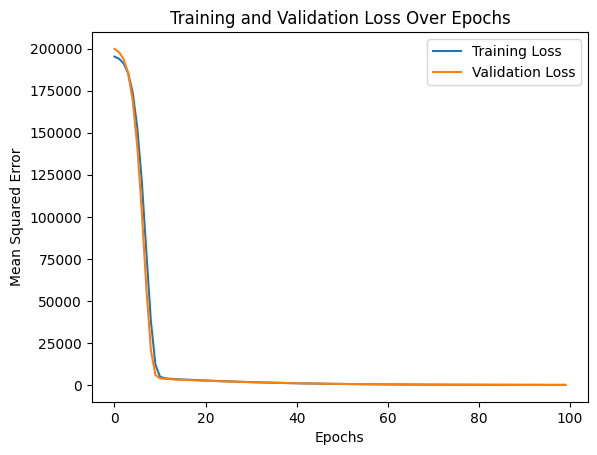

In [5]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 211.6638 - mean_squared_error: 211.6638 
Test Mean Squared Error: 225.46026611328125
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


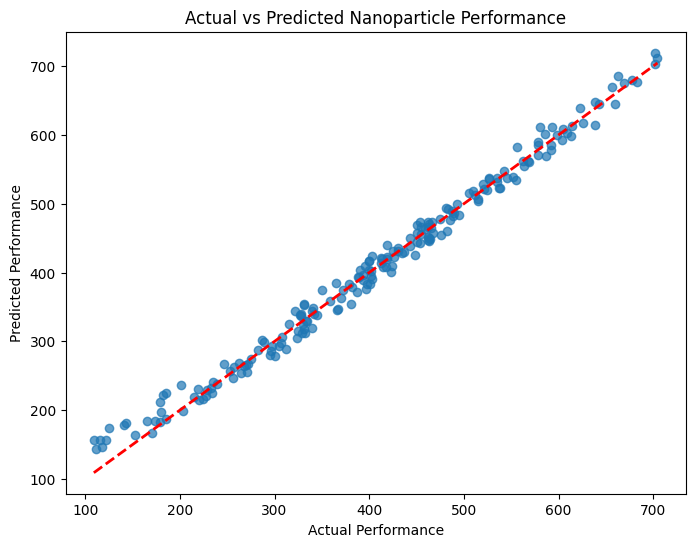

In [10]:
# Evaluate the model on the test set
test_loss, test_mse = model.evaluate(X_test_scaled, y_test)
print(f'Test Mean Squared Error: {test_mse}')

# Predict the performance for the test set
y_pred = model.predict(X_test_scaled)

# Plot actual vs predicted performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.title('Actual vs Predicted Nanoparticle Performance')
plt.show()

In [7]:
# Example: Predicting performance for a new nanoparticle configuration
new_nanoparticle = np.array([[50, 3, 200]])  # Size=50nm, Shape Factor=3, Surface Area=200 m²/g
new_nanoparticle_scaled = scaler.transform(new_nanoparticle)

predicted_performance = model.predict(new_nanoparticle_scaled)
print(f'Predicted Performance for new nanoparticle: {predicted_performance[0][0]}')


C:\Users\macbook\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Performance for new nanoparticle: 438.0300598144531
